In [1]:
# Name: Cian Morar
# Student Num: C16460726

In [2]:
# Install packages
# install.packages("plyr")
# install.packages("dplyr")
# install.packages("ggplot2")
# install.packages("ggpubr")
# install.packages(c("Rcpp","tidyverse"))
# install.packages("scales")
# install.packages("Hmisc")
# install.packages("corrplot")

In [3]:
# Load in libraries
library(plyr)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(ggpubr)
library("Hmisc")
library(corrplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.0     v stringr 1.4.0
v tidyr   1.0.2     v forcats 0.5.0
v readr   1.3.1     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::rename()    masks plyr::r

In [4]:
# Load in the datasets
df1 = read.csv("./Data/National_Health_Interview_Survey_NHIS_National_Cardiovascular_Disease_Surveillance_Data.csv", header=TRUE, sep=',', fileEncoding="latin1")
df2 = read.csv("./Data/Behavioral_Risk_Factor_Data_Heart_Disease_Stroke_Prevention.csv", header=TRUE, sep=',', fileEncoding="latin1")

In [5]:
# Ensure that the spelling of the columns are the same
names(df2) = names(df1)

In [6]:
# Transpose the dataframes and then combine them
fulldf <- rbind(df1, df2)

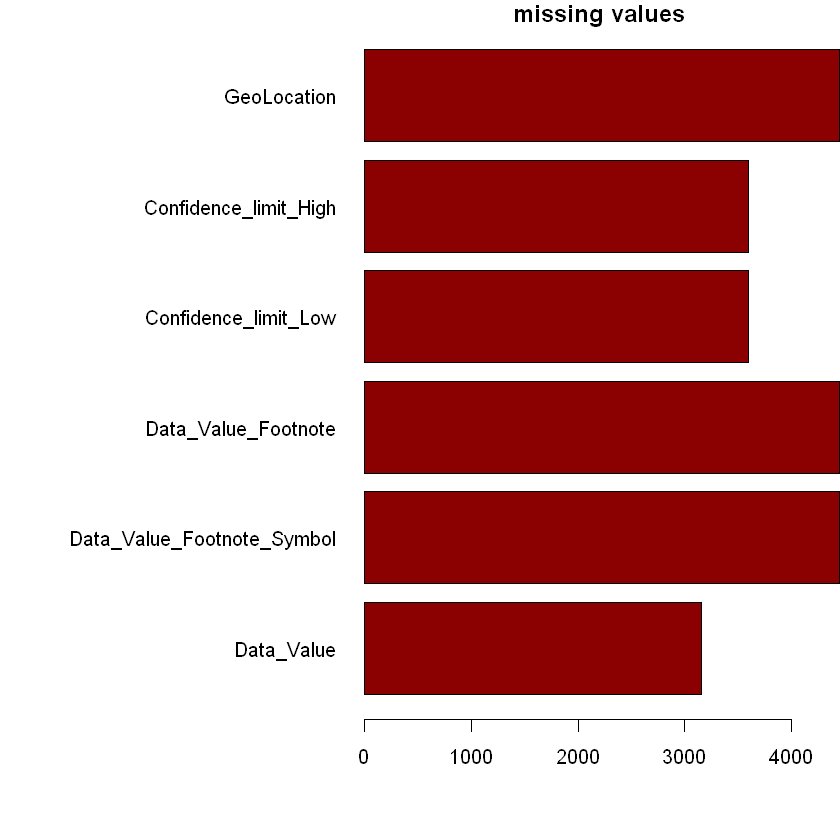

In [7]:
miss <- colSums(is.na(fulldf))

par(mar=c(5,15,1,0))
barplot(miss[miss != 0],
main = "missing values",
xlab = "",
names.arg = names(miss[miss != 0]),
col = "darkred",
las = 1,
horiz = TRUE)

In [8]:
# Omit the missing values
fulldf <- fulldf %>%
na.omit()
dim(fulldf)

[1] 31482    27

In [9]:
# Extract all the numerical columns
numeric <- unlist(lapply(fulldf, is.numeric))
numerical <- fulldf[, numeric]

In [10]:
# Check for a primary key
distinct(fulldf, Year, LocationID) # 283 rows
select(fulldf[which(fulldf$Year==2000),], Year, LocationID) # 275 rows

# LocationID is not unique
# Need to add my own pk

Year,LocationID
<int>,<dbl>
2011,48.0
2011,38.0
2013,34.0
2012,50.0
2013,27.0
2013,35.0
2013,50.0
2013,49.0
2013,55.0


Year,LocationID
<int>,<dbl>


In [11]:
# Add a foreign key since there is none
fulldf <- tibble::rowid_to_column(fulldf, "primary_key")

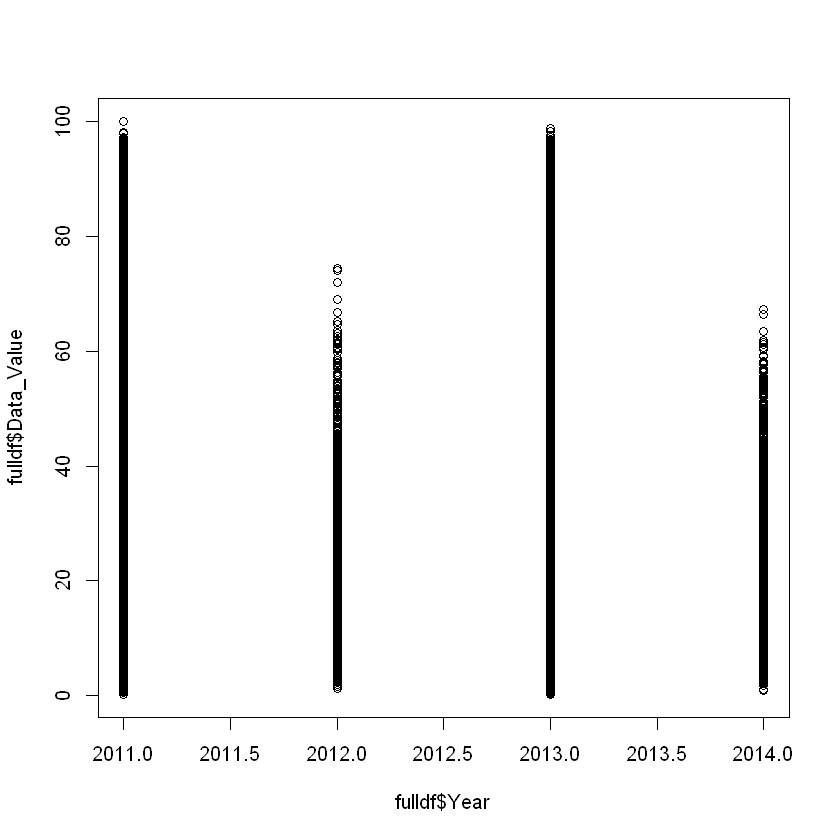

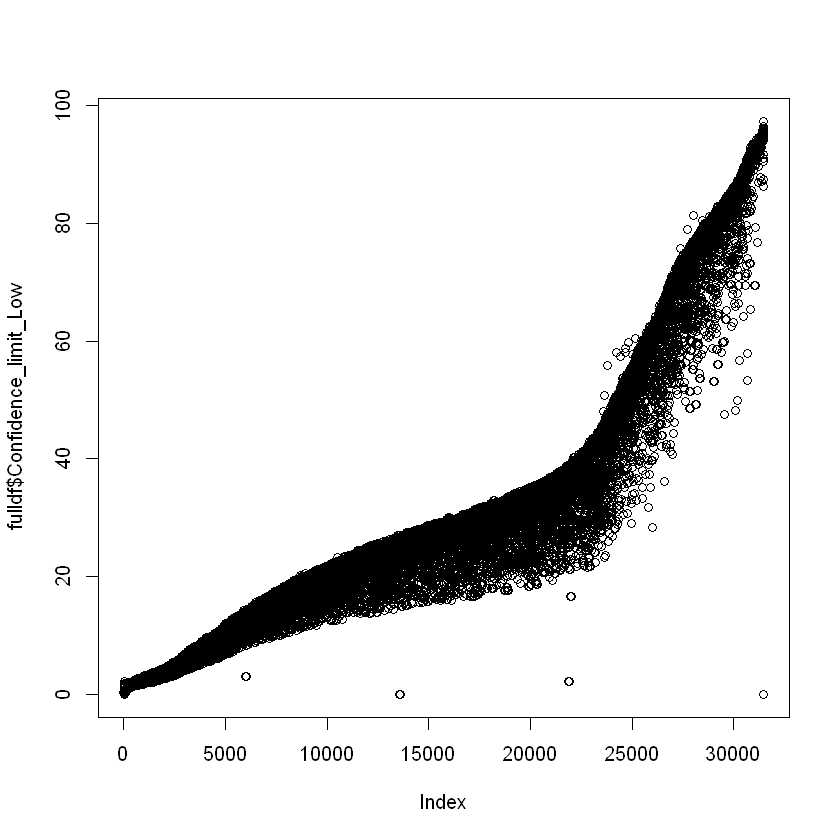

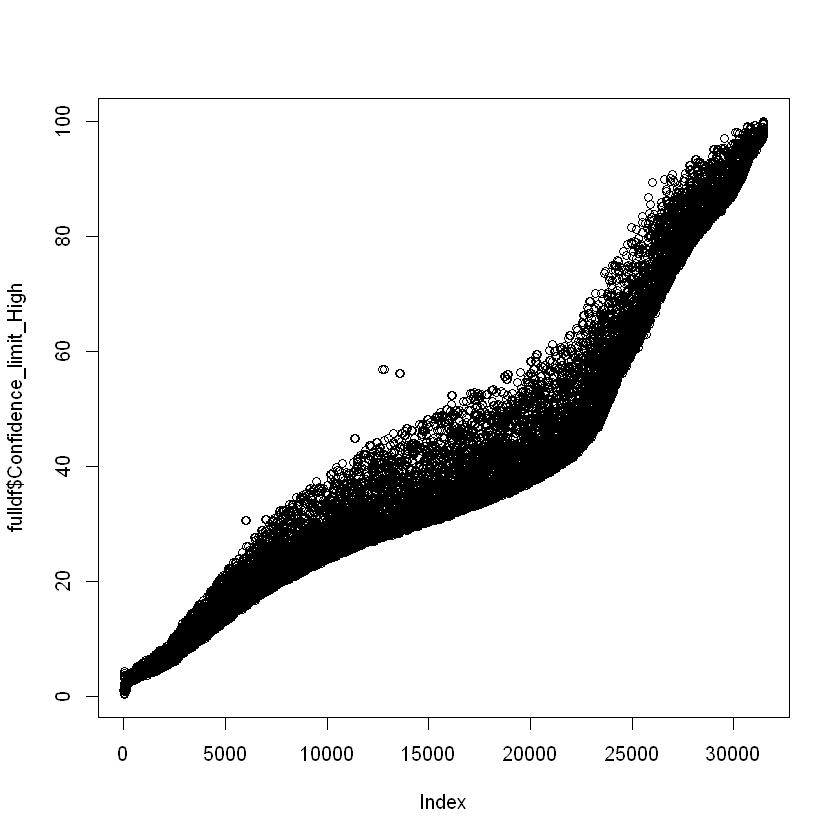

In [129]:
# Checking for outliers
plot(fulldf$Year, fulldf$Data_Value)
plot(fulldf$Confidence_limit_Low)
plot(fulldf$Confidence_limit_High)

[1] "Year"                  "Data_Value"            "Confidence_limit_Low" 
[4] "Confidence_limit_High" "LocationID"

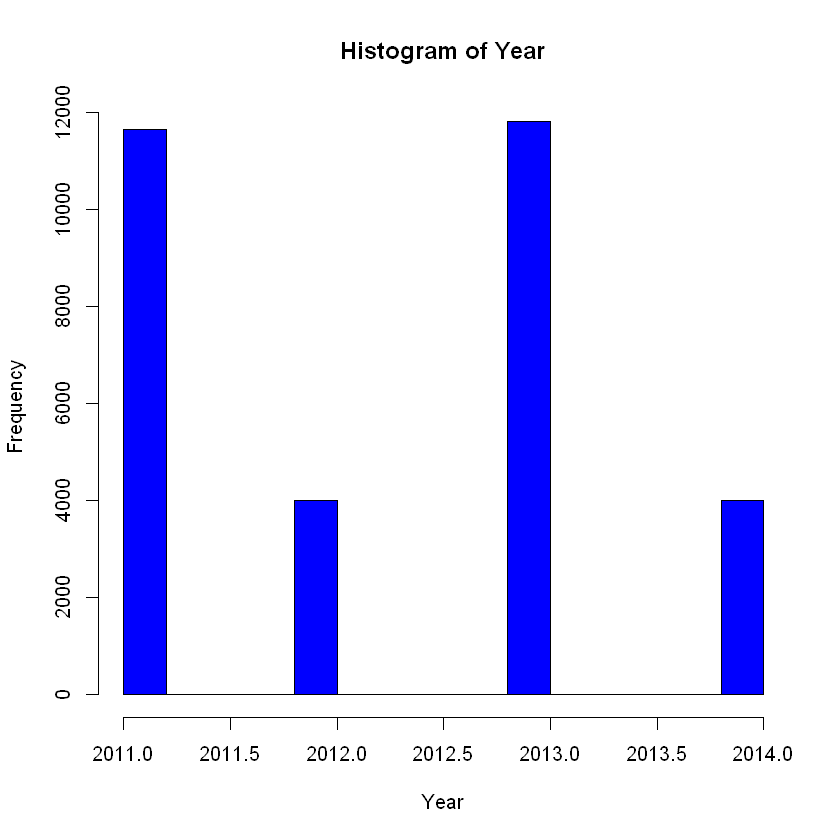

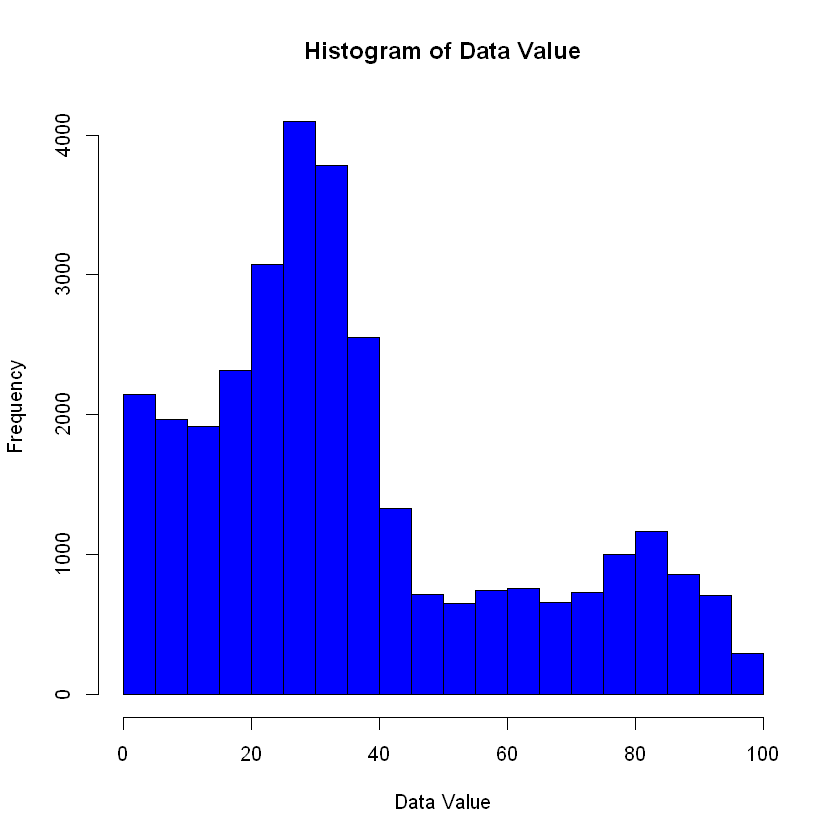

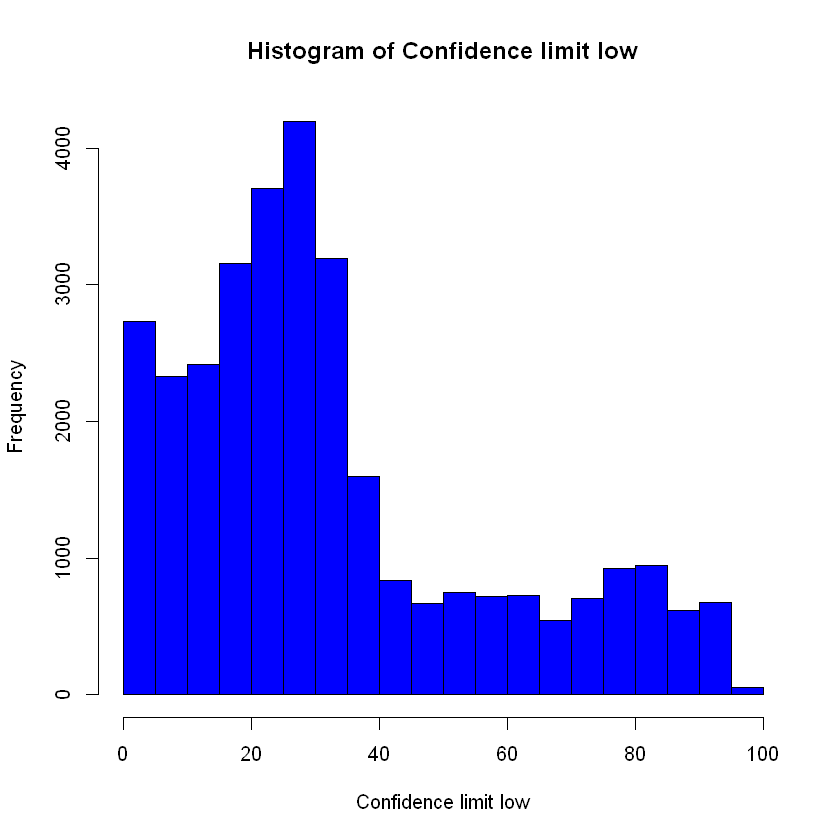

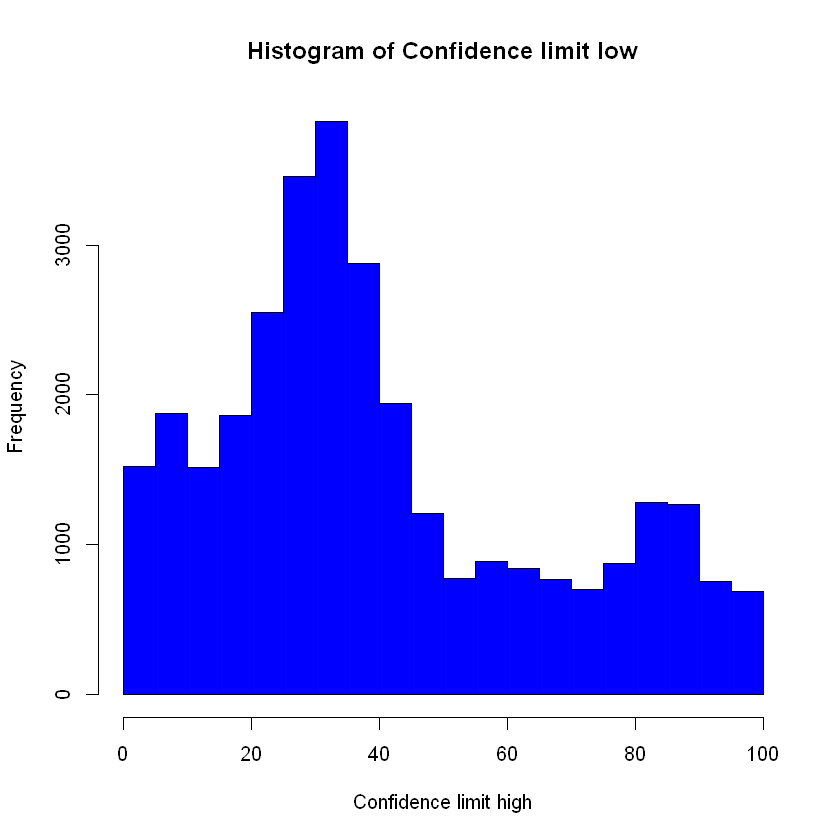

In [13]:
names(numerical)

# Majority of data is from 2011-2014 so itsnot a big deal to drop 
# the others becuase  of their missing values
hist(fulldf$Year, col="blue", xlab="Year", main="Histogram of Year")

# Slightly negatively skewed, although it is close to having a 
# normal distribution, i.e. no need to reshape this
hist(fulldf$Data_Value, col="blue", xlab="Data Value", main="Histogram of Data Value")


hist(fulldf$Confidence_limit_Low, col="blue", xlab="Confidence limit low", main="Histogram of Confidence limit low")


hist(fulldf$Confidence_limit_High, col="blue", xlab="Confidence limit high", main="Histogram of Confidence limit low")

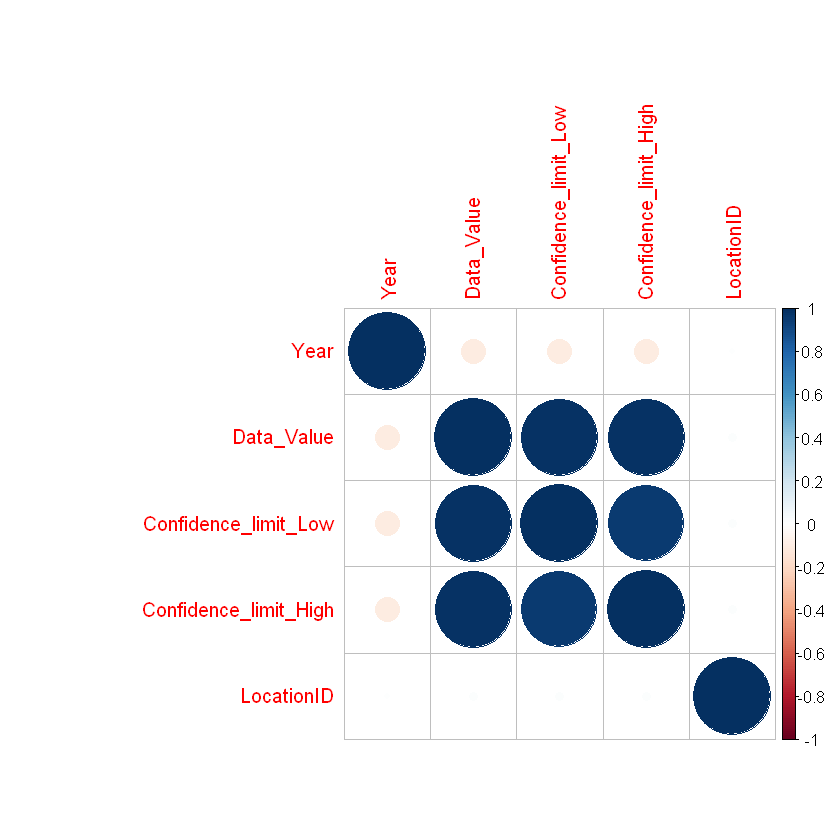

In [103]:
# Correlation graph between numerical columns
numerical.cor = cor(numerical)
corrplot(numerical.cor)

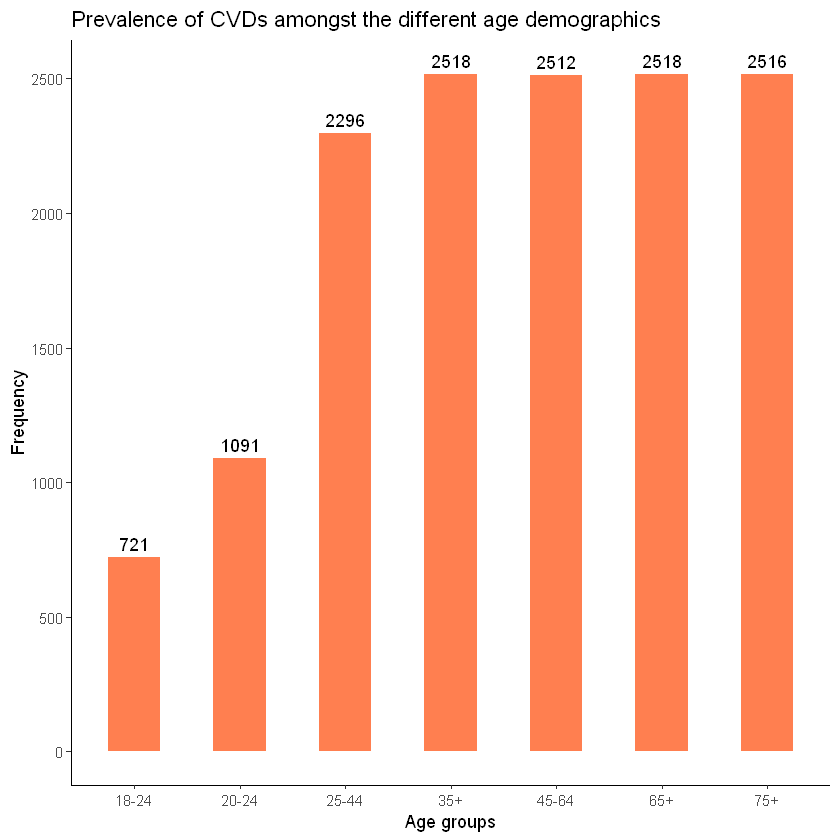

In [23]:
# Visualisation
# Chart 1 bar chart
ages <- subset(fulldf, Break_Out_Category == "Age")

ggplot(ages, aes(x = Break_Out)) +
  geom_bar(width=0.5, fill = "coral") +
  geom_text(stat='count', aes(label=stat(count)), vjust=-0.5) +
  labs(title = "Prevalence of CVDs amongst the different age demographics", x = "Age groups", y = "Frequency") +
  theme_classic()

[1] "Non-Hispanic White" "Other"              "Hispanic"          
[4] "Non-Hispanic Black" "Non-Hispanic Asian"

race$Break_Out,n
<chr>,<int>
Hispanic,2150
Non-Hispanic Asian,992
Non-Hispanic Black,2152
Non-Hispanic White,2515
Other,1977


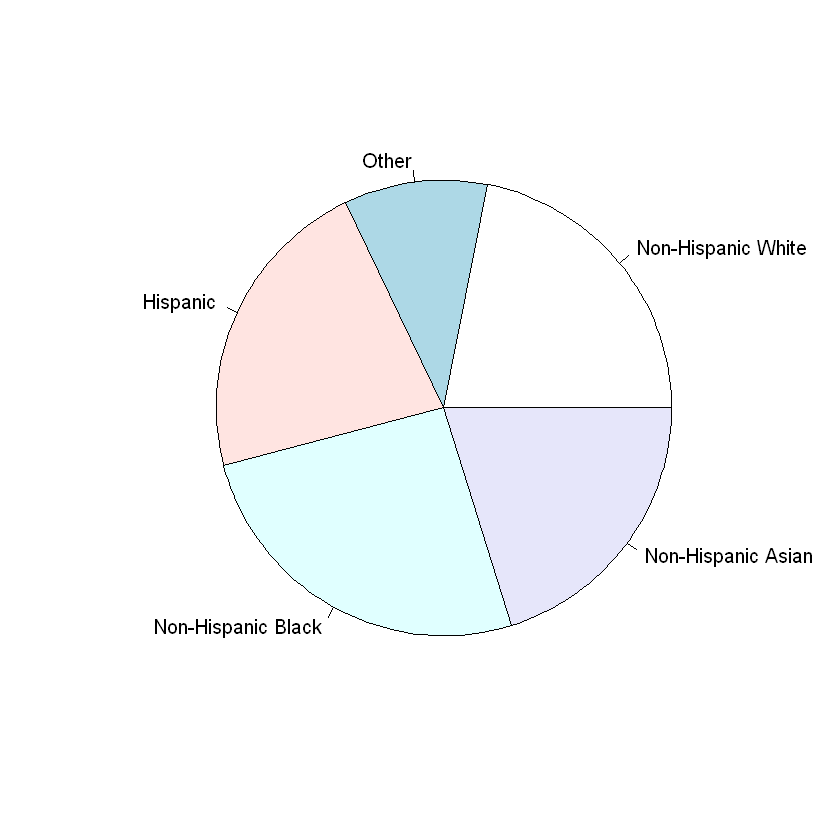

In [105]:
# Chart 2 pie chart
race <- subset(fulldf, Break_Out_Category == "Race")
unique_race <- unique(race$Break_Out)
unique_race

# Tried to get the column to convert to a list
# freq_list <- count(race, race$Break_Out)[2]
# as.list(freq_list$n)

count(race, race$Break_Out)
x <- c(2150, 992, 2152, 2515, 1977)

pie(x, unique_race)

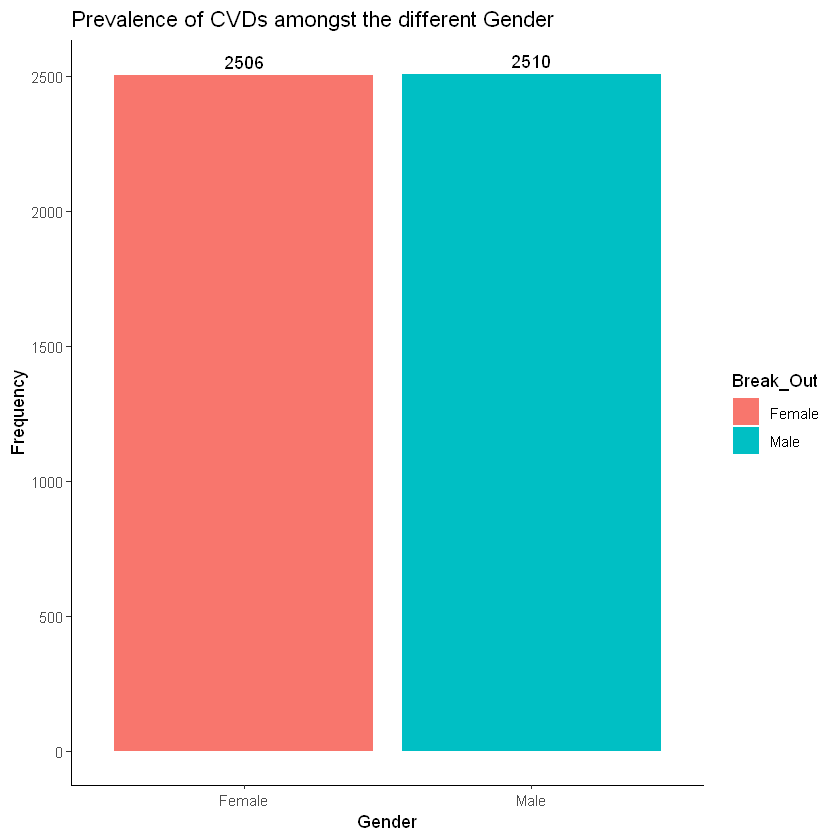

In [114]:
# Chart 3 bar plot
gender <- subset(fulldf, Break_Out_Category=="Gender")

ggplot(stroke, aes(x = Break_Out, fill=Break_Out)) +
 geom_bar(position = position_dodge()) +
labs(title = "Prevalence of CVDs amongst the different Gender", x = "Gender", y = "Frequency") + 
geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

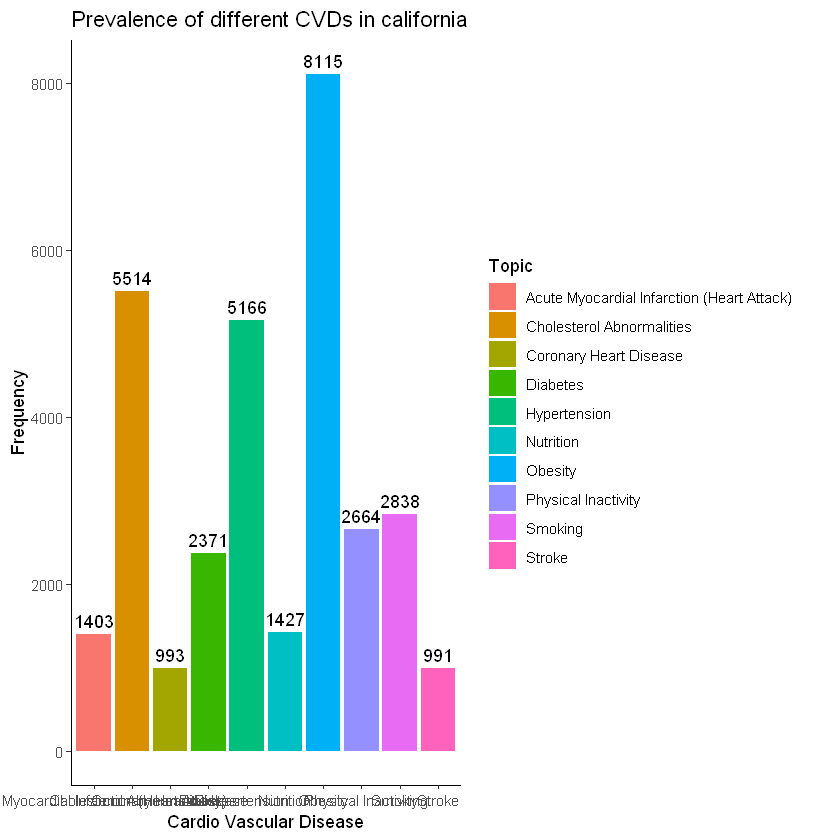

In [127]:
# Chart 4
ggplot(fulldf, aes(x = Topic, fill=Topic)) +
 geom_bar(position = position_dodge()) +
labs(title = "Prevalence of different CVDs in california", x = "Cardio Vascular Disease", y = "Frequency") + 
geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

In [128]:
# Story in a sentence

# CVDs are one of the most common causes of deaths annually, it affects people from all different ethnicities and genders 
# almost equally and the chance of getting one increases as you age, with obesity being the most common.